# Exercise 1.5_Text Mining - count the number of times the countries are mentioned in the 20th Century events text

In [1]:
# Import the required libraries

from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
from collections import Counter
sns.set()

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sorna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sorna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sorna\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\sorna\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [2]:
# Import the text file with the content from the 20th Century events wikipedia source

myfile = open('events.txt', encoding='utf-8') 

In [3]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sorna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
# Import txt file

with open('events.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

In [5]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['    Key events of the 20th century - Wikipedia                           Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages                    Search            Search                       Appearance                 Donate  Create account  Log in         Personal tools      Donate Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events in the 20th century subsection      1.1 World at the beginning of the century       1.1.1 "The war to end all wars": World War I (1914â€“1918)           1.2 Spanish flu       1.2.1 Russian Revolution and communism           1.3 Between the wars       1.3.1 Economic depression

In [6]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Historic', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', '``', 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.2', 'Spanish', 'f

In [7]:
# Frequency distribution of the words

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4923 samples and 22452 outcomes>


In [8]:
dist_words.most_common(10)

[('.', 1614),
 ('the', 1134),
 (',', 980),
 ('of', 625),
 ('and', 411),
 ('to', 333),
 ('The', 330),
 ('[', 309),
 (']', 309),
 ('in', 304)]

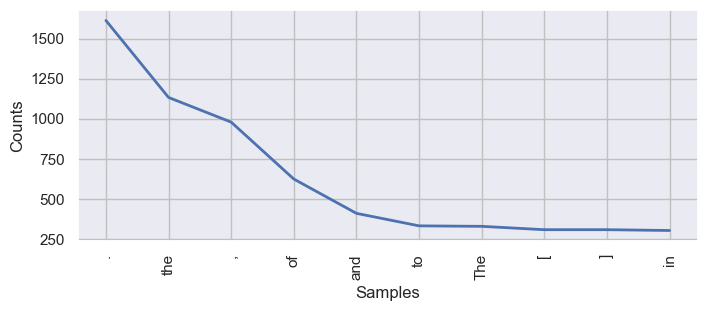

In [9]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

# The above chart shows the frequency distribution of the top 10 most common words. Here we could the basic punctuation marks and words, which are not much relevant to the analysis to be done, so we go ahead and use the Stopwords to remove the basic words.

In [10]:
# Removing stopwords in words

Filtered_words = []               # creates an empty list
for word in tokenized_word:
      if word not in stop_words:
           Filtered_words.append(word)

In [11]:
# Create a new FreqDist for filtered–words

Dist_words_filter = FreqDist(Filtered_words)
print (Dist_words_filter)

<FreqDist with 4820 samples and 17663 outcomes>


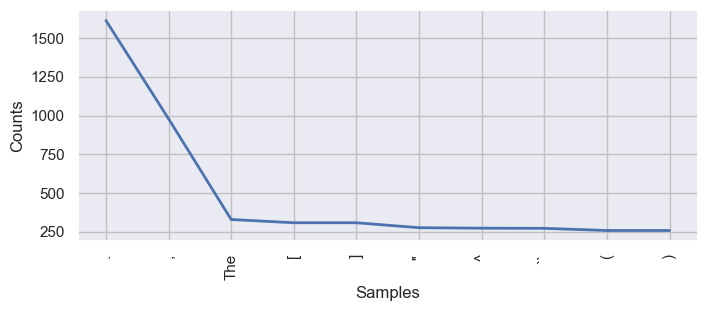

In [12]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
Dist_words_filter.plot(10,cumulative = False)
plt.show()

# The above chart shows the frequency distribution of the most common words in the text after using the Stopwords to remove the basic words like 'the', 'and', 'of' etc. The punctuation marks are yet to be handled.

In [13]:
# Substitute all punctuation marks with a space

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                        " ",        # Replace all non-letters with spaces
                        str(Filtered_words))

In [14]:

# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print (tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Spanish', 'flu', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', '

In [15]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2) 

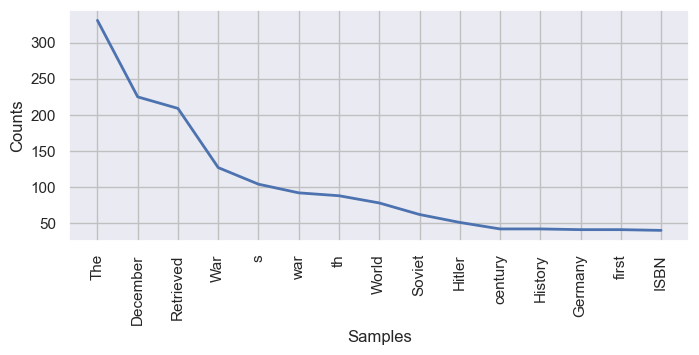

In [16]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(15,cumulative = False)
plt.show()

# The above chart shows the frequency distribution of the most common words in the text after replacing the punctuation marks with the space.

In [21]:

new_stopwords = ["And", "Then", 'n', 't', 's', 'The','p','A', 'pp','b','th','S']

filtered = []
for word in tokenized_word_2:
     if word not in new_stopwords:
        filtered.append(word)

In [22]:
# Create a new FreqDist for filtered–words

Dist_words_filter = FreqDist(filtered)
print (Dist_words_filter)

<FreqDist with 4141 samples and 10663 outcomes>


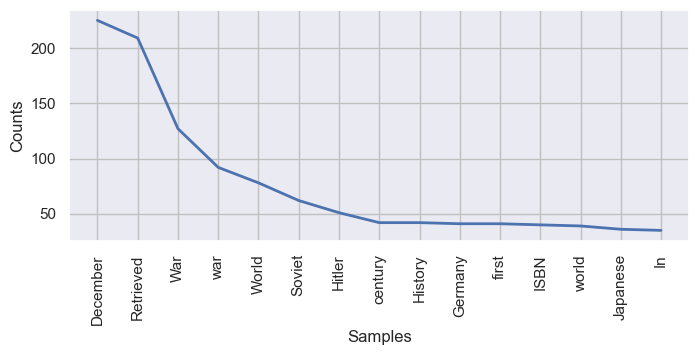

In [23]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
Dist_words_filter.plot(15,cumulative = False)
plt.show()

# This chart shows the most common words in the text after removing the new stopwords like "And", "Then", 'n', 't', 's', 'The','p','A', 'pp','b','th','S'. 'December' is the most frequently mentioned word followed by 'Retrieved', 'War', 'war', 'World' etc.

In [18]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 8.01 ms


In [19]:
tags_list = text.tags

In [20]:
# Displays the POS of the words in the text.
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSpecial", 'NNP'),
 ("'", 'POS'),
 ("'pages", 'NNS'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Donate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'accoun

In [22]:
df_text = pd.DataFrame(tags_list)
df_text.columns = [ 'Words', "Word type"]
df_t = df_text.groupby('Word type').count().reset_index()
top20 = df_t.nlargest(20, 'Words')

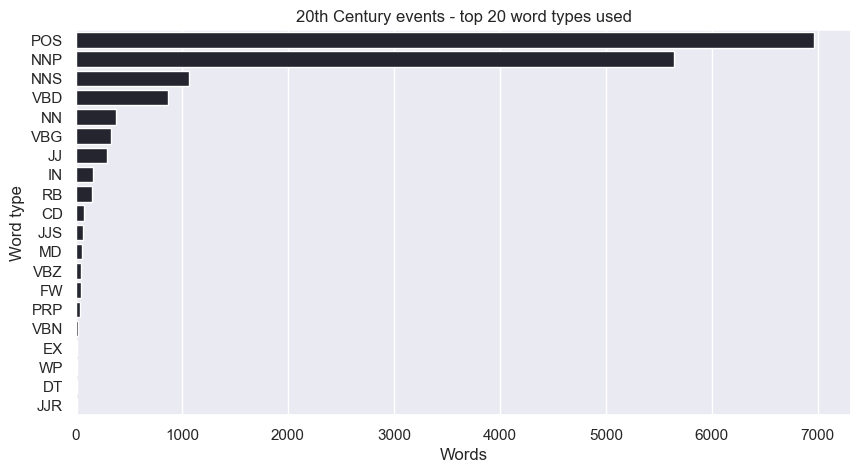

In [23]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
      sns.barplot(x = "Words", y = "Word type",
     saturation = 0.9, data = top20).set_title("20th Century events - top 20 word types used")

# The above chart shows the top 20 word types used in the text. The possessive endings( a grammatical construction used to indicate possession or ownership) is the top most frequently used word type , followed by proper nouns , pluralized nouns and verbs.

In [24]:
# Count the number of adjectives used in the text 

df = df_text[df_text['Word type'].str.startswith("JJ")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top10 = y.nlargest(10, 'Occurrences') 

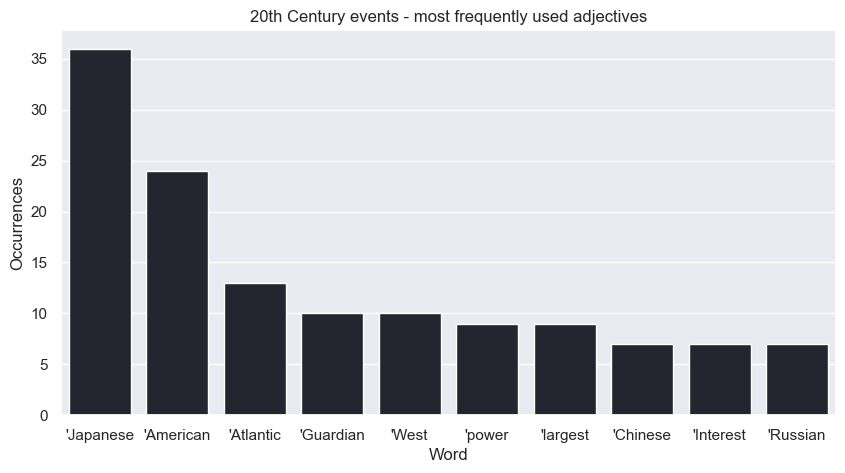

In [25]:
# Plot the bar chart with top 10 frequently used adjectives in the text

plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
      sns.barplot(x="Word", y="Occurrences",
      saturation=0.9, data = top10).set_title("20th Century events - most frequently used adjectives")

# The above chart shows the top 10 adjectives used in the text. Japanese is the most frequently used adjective followed by American abd Atlantic.

In [26]:
# Count the number of Verbs mentioned in the text 

df = df_text[df_text['Word type'].str.startswith("VB")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top10 = y.nlargest(10, 'Occurrences') 

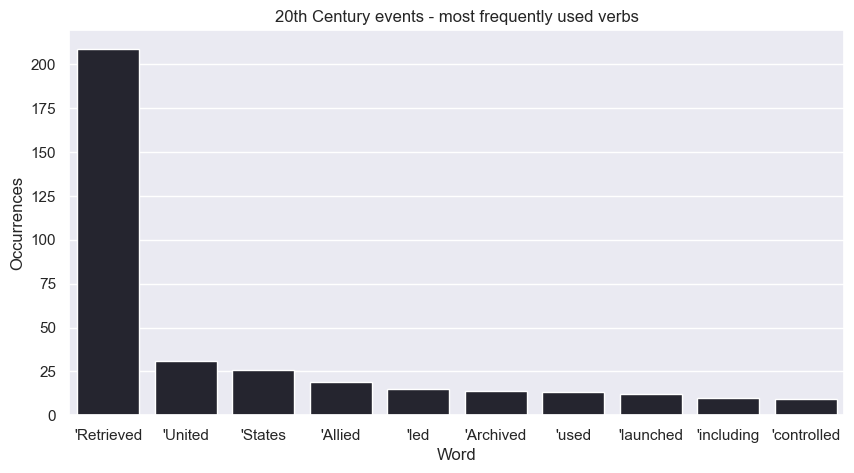

In [27]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
      sns.barplot(x="Word", y="Occurrences",
      saturation=0.9, data = top10).set_title("20th Century events - most frequently used verbs")

# The above chart shows the top 10 verbs used in the text. We have counted all forms verbs (VB, VBD, VBG, VBN, VBP, VBZ). Retrieved in the frequently used verb , followed by United, States and Allied. Here i could see that the Name United States of America is also treated as a verb. This is becos Textblob is treating United as a Verb.

In [30]:
# Count the number of nouns used in the text

df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNP") | (df_text['Word type'] == "NNS")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top10 = y.nlargest(10, 'Occurrences') 

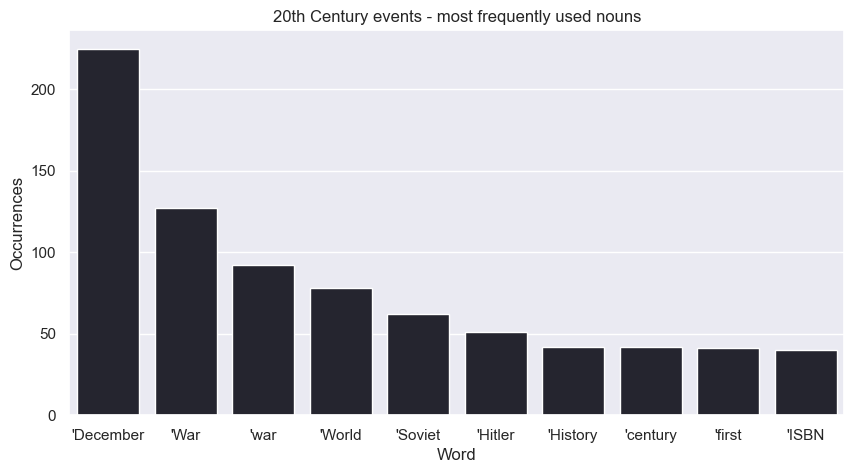

In [31]:
# Plot the bar chart with the top 10 frequently used nouns in the text

plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
      sns.barplot(x="Word", y="Occurrences",
      saturation=0.9, data = top10).set_title("20th Century events - most frequently used nouns")

# the above chart shows the top 10 frequently used nouns in the Text. The noun 'December' is  the most frequently used noun followed by War, World, Soviet etc. It is observed that the captilisation of the words also play an important role in identifying the nouns.

In [32]:
# Convert the list of the word tokens to a string

listToStr = ' '.join([str(elem) for elem in filtered])

print(listToStr)

Key events century Wikipedia Jump content Main menu Main menu move sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload fileSpecial pages Search Search Appearance Donate Create account Log Personal tools Donate Create account Log Pages logged editors learn ContributionsTalk Contents move sidebar hide Top Historic events century Toggle Historic events century subsection World beginning century war end wars World War I Spanish flu Russian Revolution communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources Exte

In [33]:
# Clean the text (removing the special characters etc, splits the words and counts how many times each word appears.

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split()) 

In [34]:
all_counts

Counter({'December': 225,
         'Retrieved': 209,
         'War': 127,
         'war': 92,
         'World': 78,
         'Soviet': 62,
         'Hitler': 51,
         'century': 42,
         'History': 42,
         'Germany': 41,
         'first': 41,
         'ISBN': 40,
         'world': 39,
         'Japanese': 36,
         'In': 35,
         'German': 35,
         'would': 35,
         'edit': 34,
         'September': 33,
         'Japan': 33,
         'II': 32,
         'Germans': 32,
         'New': 31,
         'Union': 31,
         'United': 31,
         'ISSN': 30,
         'also': 29,
         'became': 29,
         'Europe': 28,
         'July': 28,
         'August': 28,
         'end': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'history': 25,
         'June': 25,
         'Battle': 25,
         'American': 24,
         'This': 24,
         'April': 24,
         'weapons': 24,
         'October': 24,
         'com': 24,
         'new'

In [35]:
# Import the csv file containing the list of the countries to be compared with the text 

countries = pd.read_csv("C:/Users/sorna/Desktop/Data Analysis/20th-Century/countries_list_20th_century_1.5.csv")

In [36]:
countries

,Unnamed: 0,country_name
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola
...,...,...
204,205,Sahrawi Arab Democratic Republic
205,206,Somaliland
206,207,South Ossetia
207,208,Taiwan


In [37]:
# Remove the spaces before and after the country names

countries['country_name'] = countries['country_name'].str.strip()

In [38]:
countries_list = countries['country_name'].to_list()

In [39]:
countries_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 "China, People's Republic of",
 'Colombia',
 'Comoros',
 'Congo, Democratic Republic of the',
 'Congo, Republic of the',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'G

In [40]:
dict_of_counts = {d : all_counts[d] for d in countries_list}

In [41]:
#Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}
df = pd.DataFrame(dct)

In [42]:
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Donetsk People's Republic,Kosovo,Luhansk People's Republic,Niue,Northern Cyprus,Sahrawi Arab Democratic Republic,Somaliland,South Ossetia,Taiwan,Transnistria
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df = pd.DataFrame(list(dict_of_counts.items()), columns=["Country", "Count"])

In [49]:
df

,Country,Count
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [50]:
df_sorted = df.sort_values(by="Count", ascending=False).head(20)
print(df_sorted)

         Country  Count
64       Germany     41
85         Japan     33
60        France     17
82         Italy     14
140       Poland     13
191      Vietnam     13
144       Russia      9
76         India      9
9        Austria      5
139  Philippines      5
130       Norway      5
99         Libya      5
69        Guinea      4
59       Finland      4
66        Greece      4
78          Iran      4
132     Pakistan      4
81        Israel      4
101    Lithuania      3
143      Romania      3


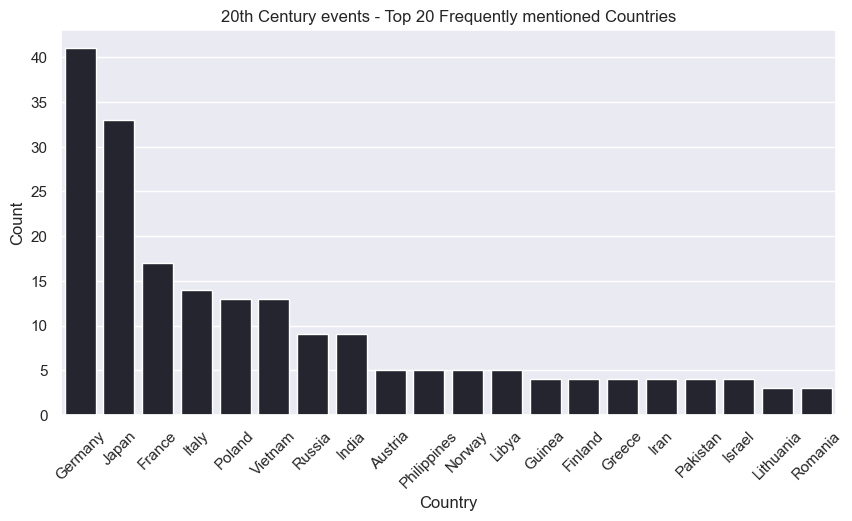

In [54]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
      sns.barplot(x="Country", y="Count",
      saturation=0.9, data = df_sorted).set_title("20th Century events - Top 20 Frequently mentioned Countries")
plt.xticks(rotation=45)  # rotate x-axis labels
plt.show()

# The above chart shows the top 20 most frequently mentioned country names in the text. Germany is the top most frequently mentioned country followed by Japan, France, Italy and so on.